In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/traffic-sign/README.dataset.txt
/kaggle/input/traffic-sign/README.roboflow.txt
/kaggle/input/traffic-sign/data.yaml
/kaggle/input/traffic-sign/valid/labels/SPEED_LIM-672-_png.rf.f2cb3175c8d09a5de615f2298503e057.txt
/kaggle/input/traffic-sign/valid/labels/SPEED_LIM-950-_png.rf.e202d69533385a8d3d0c0c1788acb482.txt
/kaggle/input/traffic-sign/valid/labels/HUMP-58-_jpg.rf.b82142add1227e8cc02d20c3a2da62a8.txt
/kaggle/input/traffic-sign/valid/labels/STEEPAS-1-_png.rf.7e9257c7f22b51562d3fe164fc73dd86.txt
/kaggle/input/traffic-sign/valid/labels/PEDC-40-_png.rf.fee0285b8793b2e9feb73afe0390ce9c.txt
/kaggle/input/traffic-sign/valid/labels/PETPUMP-4-_png.rf.849f7efc9a7035b13be9ff2454afe6dd.txt
/kaggle/input/traffic-sign/valid/labels/SPEED_LIM-46-_png.rf.6d39f351de2d3b1787b3b6256fc453f7.txt
/kaggle/input/traffic-sign/valid/labels/SPEED_LIM-1043-_png.rf.c5222667b268617c3e4853a175409653.txt
/kaggle/input/traffic-sign/valid/labels/HORNPROHIB-22-_jpg.rf.987adb77a8ed14faf17f750614ecbc86.txt

In [1]:
!nvidia-smi

Wed Apr  9 15:12:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 17.4 MB/s eta 0:00:0000:01


In [8]:
from ultralytics import YOLO

# Load YOLOv9 model
model = YOLO("yolov9c.pt")  # You can change to yolov9s.pt or yolov9m.pt

# Train the model
model.train(
    data="/kaggle/input/traffic-sign/data.yaml",  # Replace with your actual path
    epochs=30,
    imgsz=640,
    batch=16,
    name="traffic_sign_yolov9"
)


Ultralytics 8.3.105 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/kaggle/input/traffic-sign/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=traffic_sign_yolov96, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]


Overriding model.yaml nc=80 with nc=74

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 77.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-sign/train/labels... 2565 images, 9 backgrounds, 0 corrupt: 100%|██████████| 2565/2565 [00:10<00:00, 251.12it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-sign/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/traffic-sign/valid/labels... 770 images, 3 backgrounds, 0 corrupt: 100%|██████████| 770/770 [00:03<00:00, 253.02it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-sign/valid is not writeable, cache not saved.


Plotting labels to runs/detect/traffic_sign_yolov96/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000128, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/traffic_sign_yolov96
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      10.6G      1.376      4.034      1.731          9        640: 100%|██████████| 161/161 [02:11<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]


                   all        770        866      0.457      0.256      0.148     0.0913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      12.1G      1.222      2.758      1.509         11        640: 100%|██████████| 161/161 [02:13<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.559      0.282        0.3       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      12.1G      1.214       2.39      1.503         13        640: 100%|██████████| 161/161 [02:13<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.589      0.305      0.353      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      12.1G      1.216      2.136      1.508         11        640: 100%|██████████| 161/161 [02:12<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]


                   all        770        866      0.536      0.487      0.501      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      12.1G      1.189      1.958      1.482         10        640: 100%|██████████| 161/161 [02:12<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.595      0.515      0.602      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      12.1G      1.163       1.78      1.453         11        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.547      0.553      0.554      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.1G      1.149       1.64      1.439         15        640: 100%|██████████| 161/161 [02:12<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.625      0.604      0.687      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      12.1G      1.108      1.515      1.411         10        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866       0.65      0.637      0.722      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      12.1G      1.096      1.456      1.402          8        640: 100%|██████████| 161/161 [02:12<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.657      0.674      0.721       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      12.1G      1.089      1.377      1.392         12        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.679      0.656      0.735      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      12.1G      1.063      1.292      1.382         14        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.709      0.637      0.711      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      12.1G      1.041      1.258      1.359         11        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.673      0.707      0.746      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      12.1G      1.032      1.177      1.339         14        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]

                   all        770        866      0.709      0.686       0.76      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      12.1G       1.01      1.126      1.334         15        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]

                   all        770        866      0.771      0.723       0.78      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      12.1G     0.9891      1.087      1.318         13        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.783      0.689      0.766      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      12.1G     0.9921      1.078      1.319         12        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.746      0.725       0.79      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      12.1G     0.9639      1.042      1.309         11        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.728       0.75      0.799      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      12.1G     0.9583      1.015      1.306          8        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]

                   all        770        866      0.777      0.748        0.8      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      12.1G     0.9288     0.9432      1.286         13        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.775       0.77      0.822      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      12.1G     0.9165     0.9346      1.281         11        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.816      0.723      0.802      0.539


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      12.1G     0.8949     0.6119      1.344          7        640: 100%|██████████| 161/161 [02:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866       0.79      0.745      0.822       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      12.1G     0.8676     0.5505      1.319          5        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.828      0.715       0.83      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      12.5G     0.8458     0.5395      1.306          9        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.796      0.748      0.821      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      12.5G     0.8301     0.5139      1.295          5        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.782      0.776      0.832      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      12.5G     0.8051     0.4874      1.277          6        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866       0.77      0.807      0.837      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      12.5G     0.7826     0.4658      1.252          4        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.772      0.797      0.845      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      12.5G     0.7597     0.4461      1.232          5        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.804      0.816      0.848      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      12.5G     0.7512     0.4283      1.228          7        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]

                   all        770        866      0.776      0.826      0.849      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      12.5G     0.7288     0.4189      1.215          5        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]

                   all        770        866        0.8      0.789      0.834      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      12.5G     0.7116     0.3991      1.198          5        640: 100%|██████████| 161/161 [02:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]

                   all        770        866      0.799      0.787      0.829      0.551



30 epochs completed in 1.251 hours.
Optimizer stripped from runs/detect/traffic_sign_yolov96/weights/last.pt, 51.7MB
Optimizer stripped from runs/detect/traffic_sign_yolov96/weights/best.pt, 51.7MB

Validating runs/detect/traffic_sign_yolov96/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,376,302 parameters, 0 gradients, 102.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]


                   all        770        866      0.775      0.826      0.849      0.564
                     -          1          1          0          0          0          0
                     0        100        178      0.755       0.86      0.835      0.436
         Barrier Ahead         15         15      0.994          1      0.995      0.892
                Cattle          3          3      0.835          1      0.995      0.897
               Caution          1          1      0.589          1      0.995      0.697
        Cycle Crossing         11         11      0.783          1      0.995      0.752
         Dangerous Dip         15         15      0.929      0.876      0.983      0.657
          Eating Place          3          7      0.675      0.571      0.628      0.308
         Falling Rocks         16         16      0.932          1      0.995      0.619
                 Ferry          2          2      0.393        0.5      0.606      0.443
        First Aid Pos

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 16.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/traffic_sign_yolov96


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db008faeda0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [12]:
import shutil

shutil.copy('/kaggle/working/runs/detect/traffic_sign_yolov96/weights/best.pt', '/kaggle/working/best.pt')


'/kaggle/working/best.pt'

In [14]:
!ls /kaggle/working/best.pt


/kaggle/working/best.pt


In [15]:
!find /kaggle/working -name '*.pt'


/kaggle/working/best.pt
/kaggle/working/runs/detect/traffic_sign_yolov96/weights/last.pt
/kaggle/working/runs/detect/traffic_sign_yolov96/weights/best.pt
/kaggle/working/yolov9c.pt
/kaggle/working/yolo11n.pt


In [16]:
import shutil

shutil.copy(
    "/kaggle/working/runs/detect/traffic_sign_yolov96/weights/best.pt",
    "/kaggle/working/best.pt"
)


'/kaggle/working/best.pt'

In [21]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/kaggle/working/best.pt")



image 1/1 /kaggle/input/traffic-sign/test/images/BA-10-_jpg.rf.888bfb7aee73f41641cd6f2e6889831e.jpg: 640x640 1 Barrier Ahead, 49.2ms
Speed: 2.4ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict9


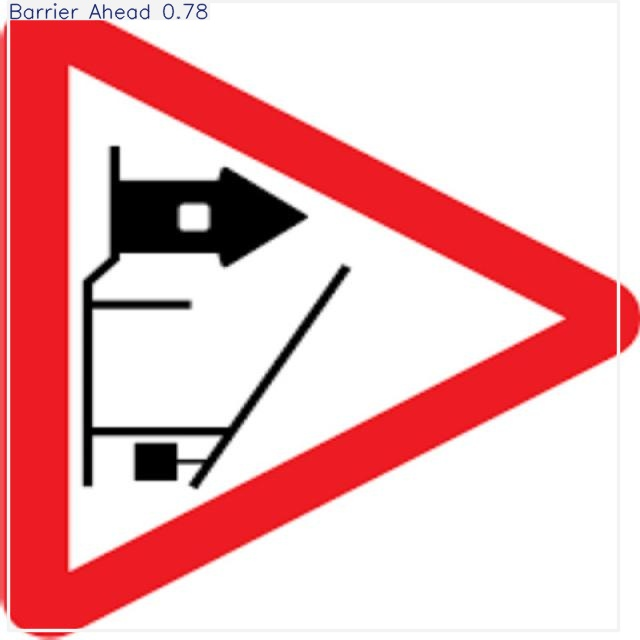

In [47]:
# Inference
results = model.predict(
    source='/kaggle/input/traffic-sign/test/images/BA-10-_jpg.rf.888bfb7aee73f41641cd6f2e6889831e.jpg',
    save=True,
    conf=0.5
)

# Display the predicted image (check the actual filename inside `runs/detect/predict`)
from IPython.display import Image, display
display(Image(filename='runs/detect/predict/BA-10-_jpg.rf.888bfb7aee73f41641cd6f2e6889831e.jpg'))


image 1/1 /kaggle/input/traffic-sign/test/images/DD-43-_jpg.rf.e9e642c5daef76ffdba5bc7b5190a72f.jpg: 640x640 1 Give Way, 49.2ms
Speed: 2.1ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


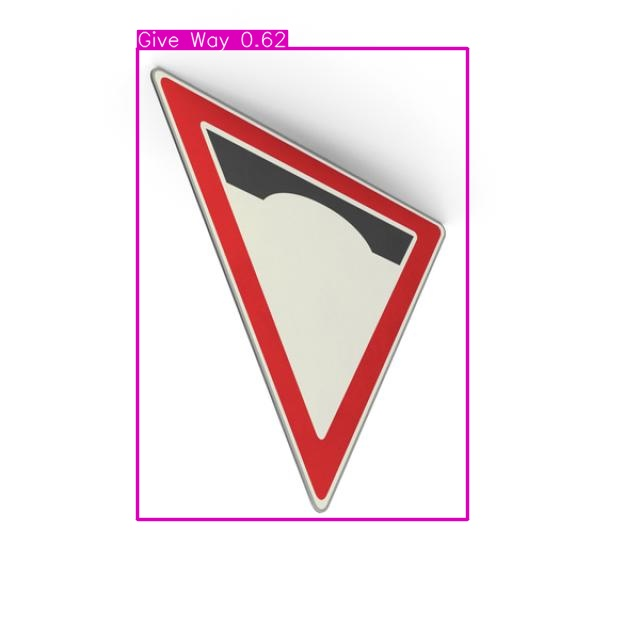

In [27]:
# /kaggle/input/traffic-sign/test/images/DD-3-_jpeg.rf.5cfa266badf21d97b9069b5511eebe75.jpg
# Inference
results = model.predict(
    source='/kaggle/input/traffic-sign/test/images/DD-43-_jpg.rf.e9e642c5daef76ffdba5bc7b5190a72f.jpg',
    save=True,
    conf=0.5
)

# Display the predicted image
from IPython.display import Image, display
display(Image(filename='runs/detect/predict/DD-43-_jpg.rf.e9e642c5daef76ffdba5bc7b5190a72f.jpg'))


In [28]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install opencv-python-headless

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]                
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]                           
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [70.9 kB]                 
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]    
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,383 kB]
Get:11 https://ppa.launchpadcontent.net/gra

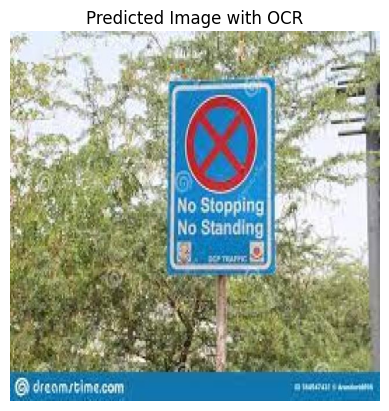

📄 Extracted Text:
No Standing
4 ca ‘mine

 



In [43]:
# Import necessary libraries
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Load the predicted image
# image_path = 'runs/detect/predict/DD-43-_jpg.rf.e9e642c5daef76ffdba5bc7b5190a72f.jpg'
image_path = '/kaggle/input/traffic-sign/test/images/NOSTOPPING-3-_jpg.rf.80036795945dcb99ca77f49258f03f88.jpg'
img = cv2.imread(image_path)

# Convert image to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run OCR using Tesseract
text = pytesseract.image_to_string(img_rgb)

# Display the image with matplotlib
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Predicted Image with OCR')
plt.show()

# Print the extracted text
print("📄 Extracted Text:")
print(text)

In [49]:
import pandas as pd

results = pd.read_csv('/kaggle/working/runs/detect/traffic_sign_yolov96/results.csv')  # Adjust path if needed
print(results.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


Plot Training and Validation Losses

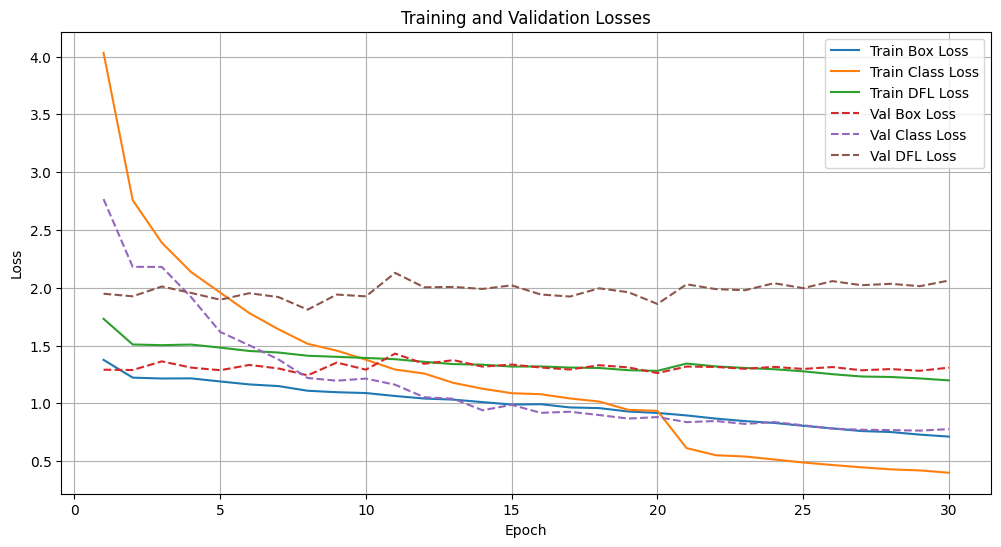

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training losses
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss')
plt.plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss')

# Plot validation losses
plt.plot(results['epoch'], results['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(results['epoch'], results['val/cls_loss'], label='Val Class Loss', linestyle='--')
plt.plot(results['epoch'], results['val/dfl_loss'], label='Val DFL Loss', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()


 Plot mAP and Precision/Recall

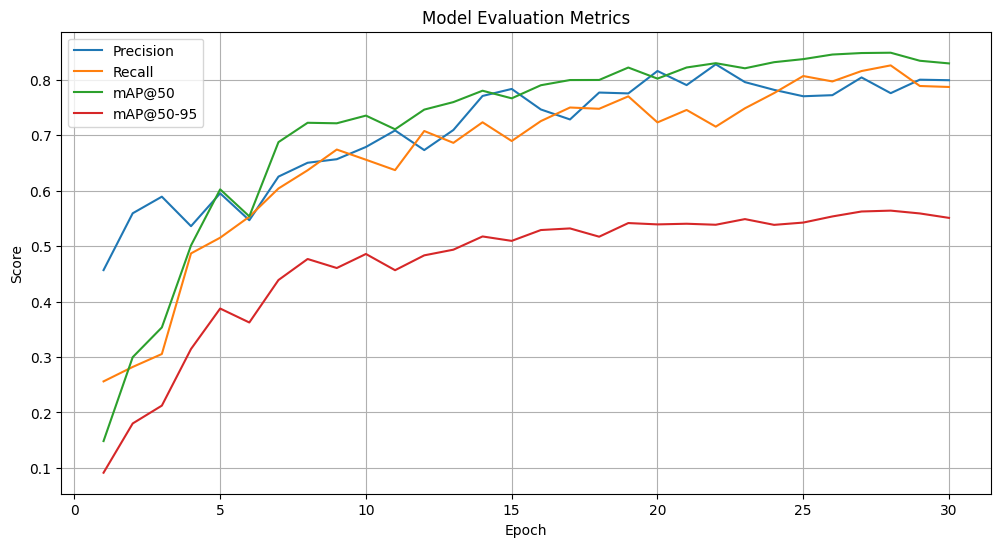

In [51]:
plt.figure(figsize=(12, 6))

plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall')
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@50-95')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.legend()
plt.grid(True)
plt.show()
